<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Supervised%20Learning/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the Advertising dataset
data = pd.read_csv("Advertising.csv")

# Display the first few rows of the dataset
print(data.head())


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


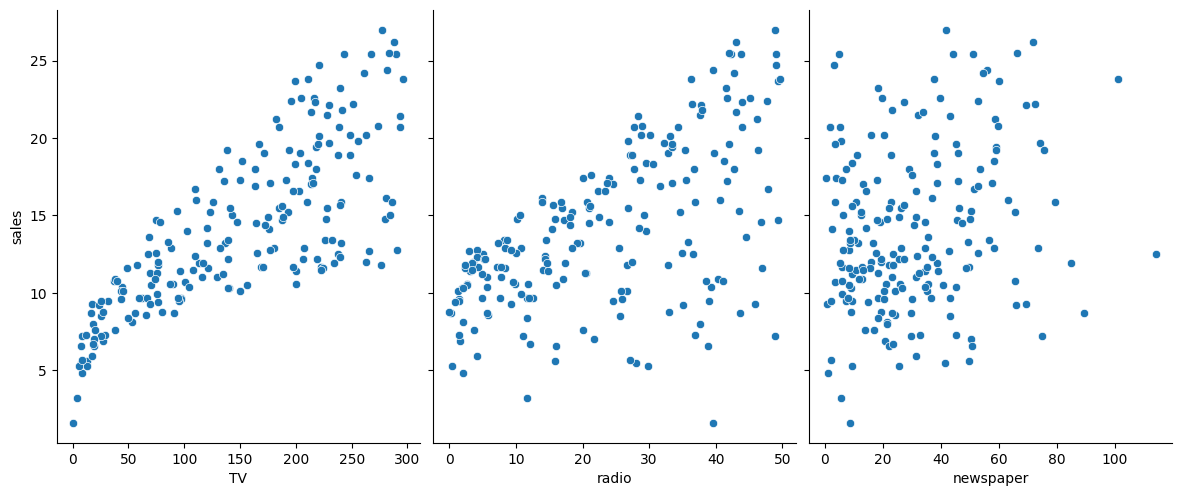

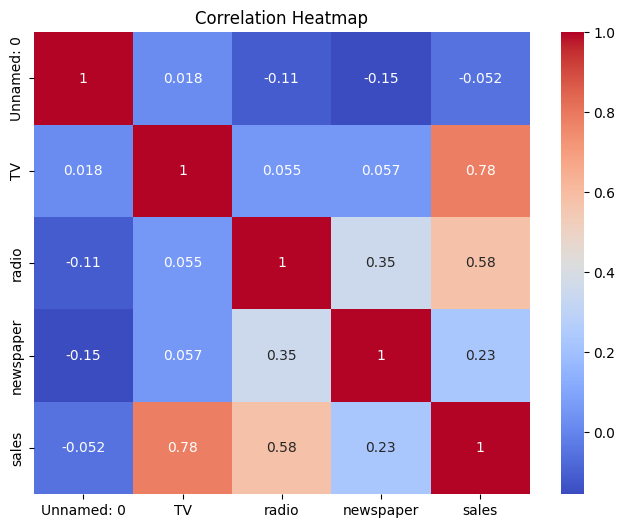

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Pairplot to visualize relationships
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=0.8)
plt.show()


# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Features and Target Variable
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (160, 3)
Testing Set Size: (40, 3)


In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 3.17
R² Score: 0.90


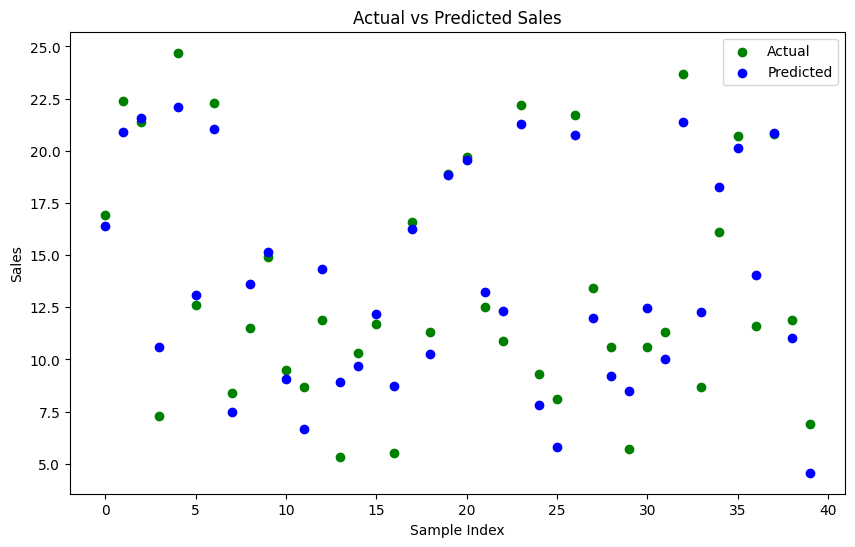

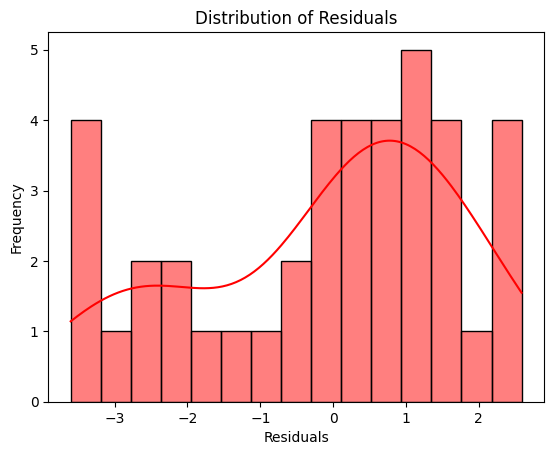

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='blue', label='Predicted')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Residual Plot
residuals = y_test - y_pred
sns.histplot(residuals, bins=15, kde=True, color='red')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


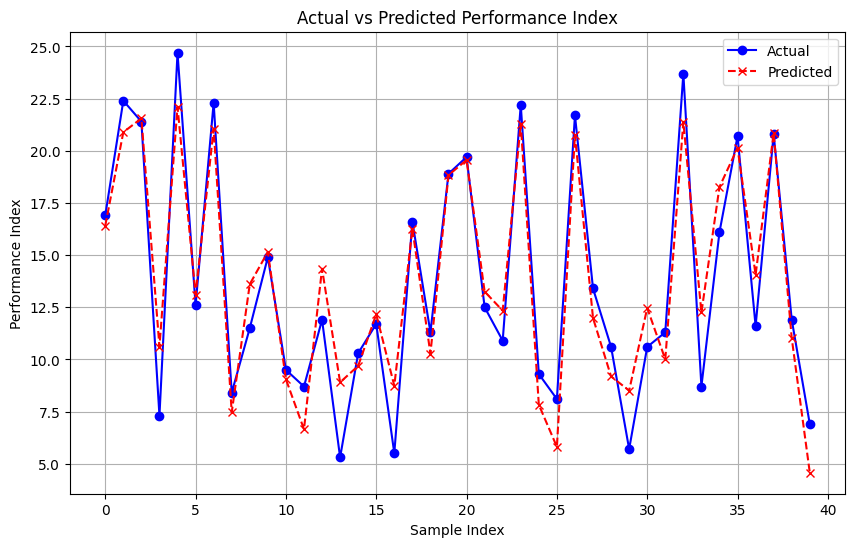

In [ ]:
# Line Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))

# Plot Actual values
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', marker='o')

# Plot Predicted values
plt.plot(range(len(y_test)), y_pred, label='Predicted', color='red', linestyle='--', marker='x')

# Add title, labels, and legend
plt.title("Actual vs Predicted Performance Index")
plt.xlabel("Sample Index")
plt.ylabel("Performance Index")
plt.legend()
plt.grid(True)  # Optional: Add a grid for better readability

plt.show()


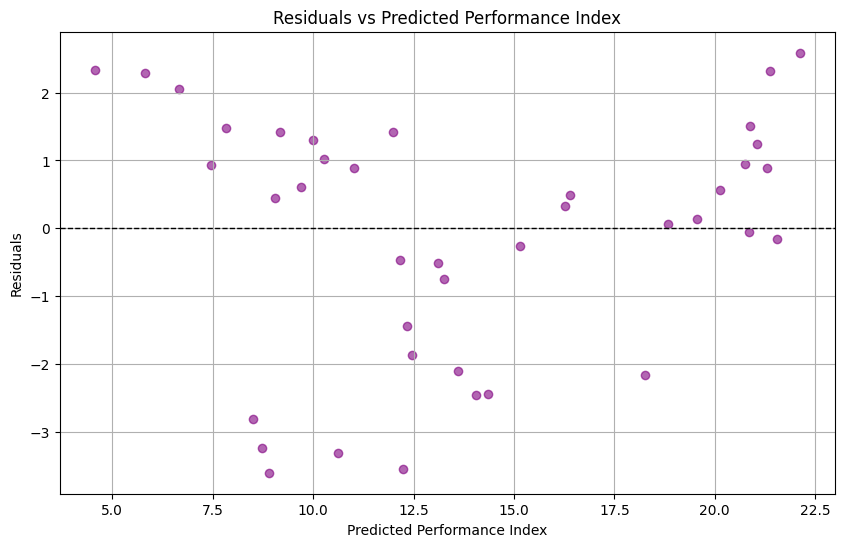

In [ ]:
# Residual vs Predicted Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at y=0
plt.title("Residuals vs Predicted Performance Index")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.grid(True)

plt.show()
